In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('C:/Users/Dahno Makaplan/Documents/Iris.csv')

In [50]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [52]:
data.drop('Id', axis = 1, inplace = True)

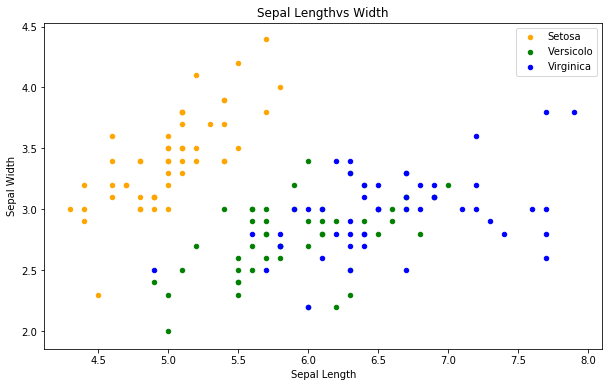

In [56]:
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='Versicolo',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='Virginica',ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Lengthvs Width')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

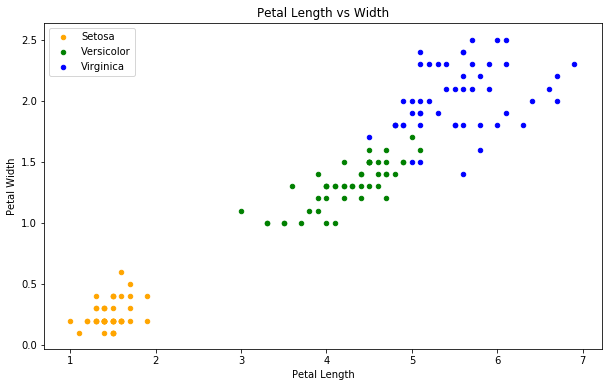

In [74]:
fig=data[data.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange',label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green',label='Versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',label='Virginica',ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Width')
fig=plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

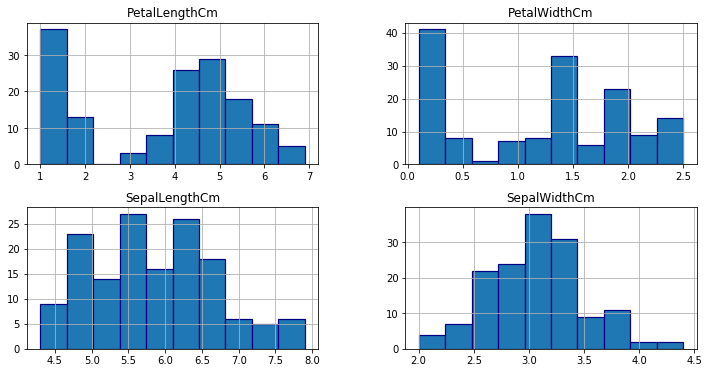

In [80]:
data.hist(edgecolor='navy', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [91]:
data.shape

(150, 5)

In [92]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


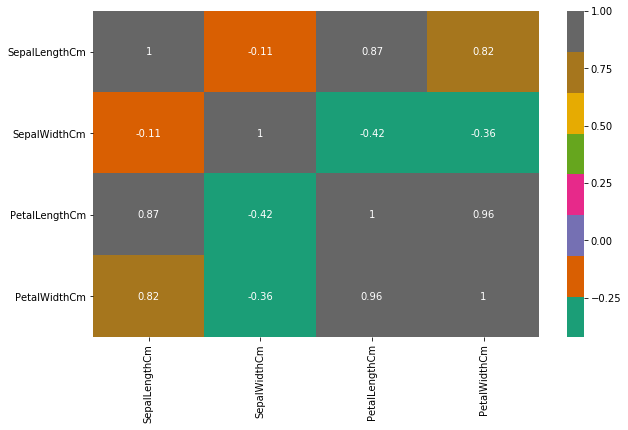

In [114]:
sns.heatmap(data.corr(), annot=True, cmap='Dark2')
fig=plt.gcf()
fig.set_size_inches(10,6)
#plt.figure(figsize=(20,14))
plt.show()

In [123]:
train, test = train_test_split(data, test_size=0.3, train_size=0.7)
test.shape

(45, 5)

In [124]:
train.shape

(105, 5)

In [125]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test.Species

In [127]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
134,6.1,2.6,5.6,1.4
5,5.4,3.9,1.7,0.4


In [128]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
109,7.2,3.6,6.1,2.5
121,5.6,2.8,4.9,2.0


In [132]:
train_y.head(2)

134    Iris-virginica
5         Iris-setosa
Name: Species, dtype: object

In [130]:
test_y.head(2)

109    Iris-virginica
121    Iris-virginica
Name: Species, dtype: object

# Models

In [152]:
model=svm.SVC()
model.fit(train_X, train_y)
prediction=model.predict(test_X)
print('Model Accuracy - SVM: ', metrics.accuracy_score(prediction,test_y))

Model Accuracy - SVM:  1.0


C:\Users\Dahno Makaplan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [151]:
model=LogisticRegression()
model.fit(train_X, train_y)
prediction=model.predict(test_X)
print('Model Accuracy - Logistic Regression: ', metrics.accuracy_score(prediction, test_y))

Model Accuracy - Logistic Regression:  1.0


C:\Users\Dahno Makaplan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dahno Makaplan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [163]:
model=DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction=model.predict(test_X)
path='Model Accuracy - Decision Tree: ', metrics.accuracy_score(prediction, test_y)
print(path)

('Model Accuracy - Decision Tree: ', 0.9333333333333333)


In [165]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction=model.predict(test_X)
path='Model Acuracy - K-Nearest Neighbours: ', metrics.accuracy_score(prediction, test_y)
print(path)

('Model Acuracy - K-Nearest Neighbours: ', 0.9777777777777777)


([<matplotlib.axis.XTick at 0x4dca3d29e8>,
 <a list of 10 Text xticklabel objects>)

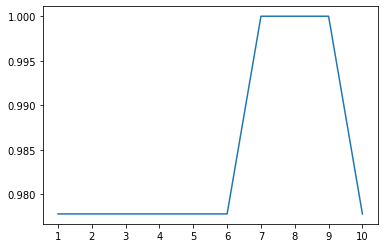

In [170]:
a_index=list(range(1, 11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1, 11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
plt.xticks(x)